In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import graphviz 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from pandas import read_csv
%matplotlib inline

In [9]:
def plot_decision_tree(a,b):
    """
    http://scikit-learn.org/stable/modules/tree.html
    """
    dot_data = tree.export_graphviz(a, out_file=None, feature_names=b,class_names=['Healthy','Diabetes'],filled=False, rounded=True,special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
dataset = read_csv('/content/sample_data/train.csv')
dataset=dataset[['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
dataset.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,3,1,89,66,23,94,28.1,0.167,21,0
3,4,0,137,40,35,168,43.1,2.288,33,1
4,5,5,116,74,0,0,25.6,0.201,30,0
5,7,10,115,0,0,0,35.3,0.134,29,0
6,8,2,197,70,45,543,30.5,0.158,53,1
7,9,8,125,96,0,0,0.0,0.232,54,1
8,11,10,168,74,0,0,38.0,0.537,34,1
9,12,10,139,80,0,0,27.1,1.441,57,0


In [12]:
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (561, 9)

Column Name           # of Null Values

Id                            1
Pregnancies                  76
Glucose                       4
BloodPressure                27
SkinThickness               164
Insulin                     272
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [15]:
trainingData = read_csv('/content/sample_data/train.csv') 
trainingData=trainingData[['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
testingData = read_csv('/content/sample_data/test.csv')
testingData=testingData[['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
trainingFeatures = trainingData.iloc[:, :-1]
trainingLabels = trainingData.iloc[:, -1]
imputer = SimpleImputer(missing_values=0,strategy='median')
trainingFeatures = imputer.fit_transform(trainingFeatures)
trainingFeatures = pd.DataFrame(trainingFeatures)
trainingFeatures.columns=['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
testingData = imputer.transform(testingData)
testingData = pd.DataFrame(testingData)
testingData.columns=['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
print("# of Rows, # of Columns: ",trainingFeatures.shape)
print("\nColumn Name           # of Null Values\n")
print((trainingFeatures[:] == 0).sum())

# of Rows, # of Columns:  (561, 9)

Column Name           # of Null Values

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


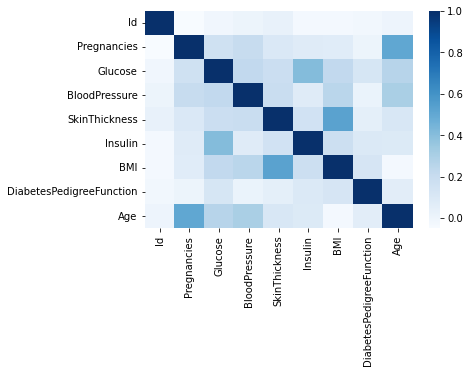

In [16]:
g = sns.heatmap(trainingFeatures.corr(),cmap="Blues",annot=False)

In [17]:
trainingFeatures.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Id,1.000000,-0.049097,-0.012092,0.009878,0.029368,-0.025323,-0.026065,-0.014659,0.007166
Pregnancies,-0.049097,1.000000,0.167959,0.207546,0.102541,0.080773,0.071451,0.010479,0.512079
Glucose,-0.012092,0.167959,1.000000,0.227243,0.187262,0.411437,0.226824,0.125974,0.262691
BloodPressure,0.009878,0.207546,0.227243,1.000000,0.200236,0.079971,0.251286,0.017491,0.305855
SkinThickness,0.029368,0.102541,0.187262,0.200236,1.000000,0.152919,0.529582,0.052178,0.117664
Insulin,-0.025323,0.080773,0.411437,0.079971,0.152919,1.000000,0.181902,0.101191,0.093495
BMI,-0.026065,0.071451,0.226824,0.251286,0.529582,0.181902,1.000000,0.128195,-0.026500
DiabetesPedigreeFunction,-0.014659,0.010479,0.125974,0.017491,0.052178,0.101191,0.128195,1.000000,0.062651
Age,0.007166,0.512079,0.262691,0.305855,0.117664,0.093495,-0.026500,0.062651,1.000000


In [18]:
trainingFeatures2 = trainingFeatures.drop(['Pregnancies','BloodPressure','DiabetesPedigreeFunction', 'Age','SkinThickness','Insulin','Id'], axis=1)

          Glucose       BMI
Glucose  1.000000  0.226824
BMI      0.226824  1.000000


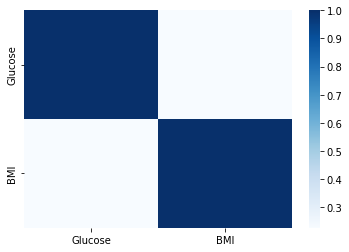

In [19]:
g = sns.heatmap(trainingFeatures2.corr(),cmap="Blues",annot=False)
print(trainingFeatures2.corr())


Feature Importance:

    Feature  absCoefficient
0  Glucose        0.696293
1      BMI        0.303707 



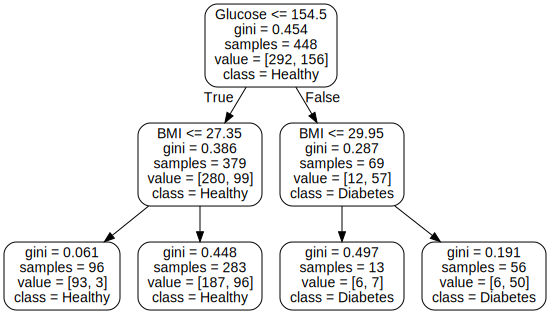

In [20]:
model = DecisionTreeClassifier(max_depth=2,min_samples_leaf=2)
X_train, X_test, y_train, y_test = train_test_split(trainingFeatures2, trainingLabels, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
columns = trainingFeatures2.columns
feature_names = trainingFeatures2.columns.values
coefficients = model.feature_importances_.reshape(trainingFeatures2.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Feature']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('\nFeature Importance:\n\n',fullList,'\n')
plot_decision_tree(model,feature_names)

DecisionTreeClassifier:

Cross_Val_Score: 75.06% (5.10%)


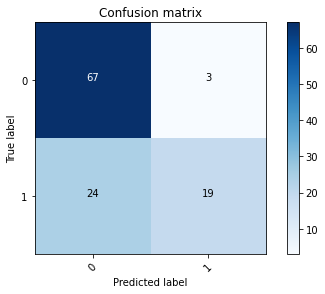

In [24]:
from typing import Any
kfold = KFold(n_splits=10)
results = cross_val_score(model, trainingFeatures2, trainingLabels, cv=kfold)
print("DecisionTreeClassifier:\n\nCross_Val_Score: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
prediction = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction)
dict_characters = {0: 'Healthy', 1: 'Diabetes'}
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')

In [25]:
test = testingData
test = pd.DataFrame(test)
test.columns=['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
test2 = test.drop(['Id','Pregnancies','BloodPressure','DiabetesPedigreeFunction', 'Age','SkinThickness','Insulin'], axis=1)
my_predictions = model.predict(test2)
Identifier = test.Id.astype(int)
my_submission = pd.DataFrame({'Id': Identifier, 'Outcome': my_predictions})
my_submission.to_csv('my_submission.csv', index=False)
my_submission.head()

,Id,Outcome
0,2,1
1,6,0
2,10,0
3,13,1
4,16,0
